In [1]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
import os
from collections import defaultdict
from matplotlib import cm
import matplotlib as mpl
mpl.style.use('classic')
plt.rcParams.update({'font.size':22})
import os.path, time
import math

# Mean-Variance return plots

psi:  0.0
psi:  0.002
psi:  0.0015


/home/ml/ajain25/.conda/envs/MujocoVenv/lib/python3.6/site-packages/ipykernel_launcher.py:74: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
/home/ml/ajain25/.conda/envs/MujocoVenv/lib/python3.6/site-packages/ipykernel_launcher.py:74: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
/home/ml/ajain25/.conda/envs/MujocoVenv/lib/python3.6/site-packages/ipykernel_launcher.py:90: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


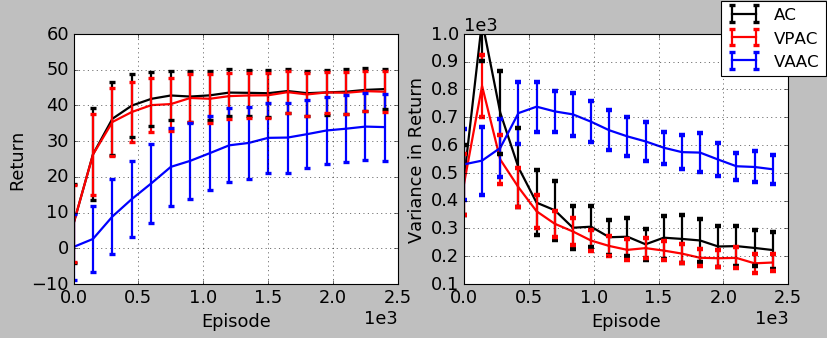

In [28]:
mpl.style.use('classic')
plt.rcParams.update({'font.size':16})
fig, (ax0, ax1) = plt.subplots(ncols=2,sharex=True, figsize=(10, 4))
plt.tight_layout()
line_object = []
line_label = []

path = "../../Results/Results_Puddle"
save_dir = os.path.join(path, "Plots", "Performance")
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
colors = ['k', 'r', 'b', 'g']

# add folder location to pick results for VPAC, AC, VAAC
psi_folder =["VPAC/Psi0.0", "VPAC/Psi0.002", "VAAC/Psi0.0015"]
line_label = ['AC', 'VPAC','VAAC']

for ind, current_folder in enumerate(psi_folder):
    psi = current_folder.split("Psi")[1]
    print("psi: ", psi)
    current_folder = os.path.join(path, current_folder)
    # These evaluations are in the target policy
    mean_mean = np.load(os.path.join(current_folder, "MeanMean.npy")) # Average over runs for return
    mean_std = np.load(os.path.join(current_folder, "MeanStd.npy")) # Standard dev.over runs for return
    var_mean = np.load(os.path.join(current_folder, "VarMean.npy")) # Average over runs for variance in the return
    var_std = np.load(os.path.join(current_folder, "VarStd.npy")) # Std. dev. over runs for variance in the return
    neps = 2500
    x_axis = list(np.arange(0, neps, 20))
    x_axis.append(neps-1)
    x_axis = np.array(x_axis)    
    new_mean = []
    new_mean_std = []
    window = 50
            
    # smoothing results
    for eps in np.arange(0,neps-window):
        new_mean.append(np.mean(mean_mean[eps: eps+window]))
        new_mean_std.append(np.mean(mean_std[eps: eps+window]))
    new_mean = np.asarray(new_mean)
    new_mean_std = np.asarray(new_mean_std)
    
    var_mean = var_mean[:x_axis.shape[0]]
    var_std = var_std[:x_axis.shape[0]]
    mean_window = 150
    var_window = 7
    l = ax0.errorbar(np.arange(0,neps-window)[::mean_window], new_mean[::mean_window], (new_mean_std)[::mean_window],
                 barsabove=True, linewidth = 2,capthick = 3, color = colors[ind])    
    ax1.errorbar(x_axis[::var_window], var_mean[::var_window], (var_std)[::var_window], barsabove=True,
                 linewidth = 2,capthick = 4, color = colors[ind])
    line_object.append(l)
    
fig.legend(line_object,labels=line_label,   # The labels for each line
       loc="best",   # Position of legend
           borderaxespad=0.1,
           prop={'size': 15})

ax0.set_ylabel("Return",fontsize=16)
ax1.set_ylabel("Variance in Return",fontsize=16)
ax0.set_xlabel("Episode",fontsize=16)
ax1.set_xlabel("Episode",fontsize=16)
ax0.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.set_ylim(100,1000)
ax0.grid(True)
ax1.grid(True)

fig.savefig((os.path.join(save_dir,"Return"+".png")), dpi=100, facecolor='w', edgecolor='w',
           orientation='portrait', papertype=None, format=None,
           transparent=True, bbox_inches='tight', pad_inches=0,
           frameon=None)     

# Qualitative visualization

In [68]:
layout = """\
wwwwwwwwwwww
w          w
w          w
w          w
w   ffff   w
w   ffff   w
w   ffff   w
w   ffff   w
w          w
w          w
w          w
wwwwwwwwwwww
"""


In [234]:
#Plot Puddle in Discrete World
import gym
from PuddleDiscrete import PuddleD
import os
import matplotlib.pyplot as plt
import seaborn as sn

class Tabular:
    def __init__(self, nstates):
        self.nstates = nstates

    def __call__(self, state):
        return np.array([state, ])

    def __len__(self):
        return self.nstates
    
   
read_folder = "../../Results/Results_Puddle/PuddleDiscreteVPAC" # read folder dir
names =["R100_E800_Psi0.0_LRC0.5_LRTheta0.05_LRV0.0_temp100.0_lambda1.0_seed10",
        "R100_E800_Psi0.0015_LRC0.5_LRTheta0.05_LRV0.1_temp100.0_lambda1.0_seed10"]

psi_names = ["0.0", "0.0015"]

index=0
env = gym.make('Puddle-v1')
num_states = env.observation_space.n
features = Tabular(num_states)
nactions = env.action_space.n
weight_policy_total_list =[]

for n in names:
    weight_policy_total_list.append(np.load(os.path.join(read_folder, names[index],"Weights_Policy.npy")))
    

In [235]:
r_folder = os.path.join(read_folder, "Plots")
if not os.path.exists(r_folder):
    os.makedirs(r_folder)

# safe_index = 0 (AC)
# safe_index = 1 (VPAC)
safe_index = 0
weight_policy_total = weight_policy_total_list[safe_index]

In [236]:
def getEnvLayout(layout,ann_format_char = True, wall_color=5):
    num_elem = 12
    line_count = 0
    mat_layout = -2*np.ones((num_elem, num_elem))
    mapping_state_row_col = defaultdict(list)
    ann_layout_char = np.chararray((num_elem, num_elem), unicode=True)
    ann_layout_num = np.zeros((num_elem, num_elem))        
    
    state_count = 0
    for line in layout.splitlines():
        for i in range(num_elem):
            if line[i]!="w":
                mapping_state_row_col[state_count].extend([line_count, i])
                ann_layout_num[line_count, i] = state_count
                state_count +=1            
            if line[i] == "f":
                mat_layout[line_count, i] = 10
                ann_layout_char[line_count, i]='F'
            elif line[i]=="w":
                mat_layout[line_count, i] = wall_color
        line_count +=1
    if ann_format_char==True:
        ann_layout = ann_layout_char
    else:
        ann_layout = ann_layout_num
    return mat_layout, ann_layout, mapping_state_row_col

In [237]:
def GetFrozenStates():
    num_elem = 12
    line_count = 0
    element_count = 0
    frozen_states =[]
    state_num=0
    for line in layout.splitlines():
        for i in range(num_elem):        
            if line[i] == "f":
                frozen_states.append(state_num)
            if line[i]!="w":
                state_num +=1
    return frozen_states

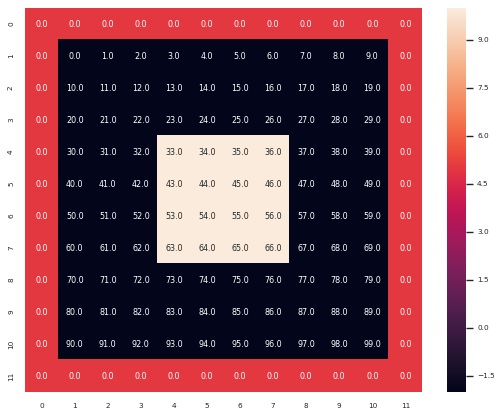

In [238]:
# Visuzlization of tabular puddle-world environment

plt.figsize=(1,1)
mat_layout,ann_layout, mapping_state_row_col = getEnvLayout(layout, False)
sn.set(font_scale=0.6)
ax = sn.heatmap(mat_layout, annot = ann_layout, fmt = '')
plt.show()
plt.close()

In [239]:
run_val = 55 #Mention run number which one wants to visualize

## Sampled Trajectories

In [ ]:
run_to_show = run_val

init_state_done =[]
count_graph_plot = 0
episode =-1
folder = os.path.join(r_folder,"traj")
if not os.path.exists(folder):
        os.makedirs(folder)

folder = os.path.join(folder,"Psi"+psi_names[safe_index])
if not os.path.exists(folder):
    os.makedirs(folder)
        
num_elem = 12
possible_goal_states = [9]
max_time_step = 50
# 0:U
# 1:D
# 2:L
# 3:R
# 4:UR
# 5:DR
# 6:DL
# 7:UL
action_mapping = [u'↑',u'↓', u'←',u'→',u'↗',u'↘',u'↙',u'↖']

start_states =[]
num_traj =98
count_traj = 0
while(count_traj<num_traj):    
    curr_time = 0
    init_state = env.reset()
    if init_state in init_state_done:
        continue
    else:
        count_traj +=1
        ann_action = np.chararray((num_elem, num_elem), unicode=True)
        init_state_done.append(init_state)
        
    curr_state = init_state
    cmap = sn.dark_palette("seagreen",n_colors=4, as_cmap=True)

    goal_state = 9 # goal state
    mat_layout, ann_layout, mapping_state_row_col = getEnvLayout(layout)
    while(curr_state!= goal_state and max_time_step > curr_time): 
        action = np.argmax(weight_policy_total[run_to_show,episode,curr_state, :])
        next_state,r,d,_ = env.step(action)
        row, col = mapping_state_row_col[curr_state]
        row_2, col_2 = mapping_state_row_col[next_state]
        mat_layout[row, col] = 15
        if curr_state == init_state:
            ann_action[row,col] = 'S'
            mat_layout[row,col] = 20
        else:
            ann_action[row, col] =action_mapping[action]
        curr_state = next_state
        curr_time +=1

    if curr_state == possible_goal_states[0]:
        r,c = mapping_state_row_col[curr_state]
        mat_layout[r,c] = 20
        ann_action[r,c] = 'G'
        
    plt.figure(figsize = (5,5))
    sn.set(font_scale=0.6)
    ax = sn.heatmap(mat_layout, annot = ann_action, fmt = '',
                    cbar=False,annot_kws={"size": 20},square=True,
                    linewidth =0.25, linecolor = "grey")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    init_state_done.append(init_state)
    count_graph_plot +=1
    plt.savefig((os.path.join(folder, "Policy_init"+str(init_state)+"_run"+str(run_to_show)+"_eps"+str(episode)+".png")), dpi=400, facecolor='w', 
    edgecolor='w', orientation='portrait', papertype=None, format=None,
    transparent=True, bbox_inches='tight', pad_inches=0, frameon=None)
    plt.show()
    plt.close()

## State visitation frequency 

In [ ]:
dir_name = os.path.join(r_folder,"freq")
if not os.path.exists(dir_name):
        os.makedirs(dir_name)

folder = os.path.join(dir_name,"Psi"+psi_names[safe_index])
if not os.path.exists(folder):
        os.makedirs(folder) 
        
episode =-1 # visualizing results for last episode
normalized_freq_run_wise = []
for run_to_show in [run_val]:
    num_trajectory = 10000
    count_trajectory = 1
    max_time_step = 50
    
    trajectories = []
    rewards = []
    averaged_reward =[]
    steps =[]
    frozen_states = GetFrozenStates()
    start_states = []

    freq_states = np.zeros(100)
    while(count_trajectory <= num_trajectory):
        start = env.reset()
        count_trajectory+=1
        new_trajectory= []
        new_reward = []
        start_states.append(start)
        curr_state = start
        new_trajectory.append(start)
        curr_time = 0
        freq_states[curr_state] +=1
        while(curr_state!= 9 and max_time_step > curr_time):
            action = np.argmax(weight_policy_total[run_to_show,episode,curr_state, :])
            next_state,r,d,_ = env.step(action)
            freq_states[next_state] +=1
            curr_state = next_state
            curr_time +=1
    
    normalized_freq = (freq_states-min(freq_states))/(max(freq_states)-min(freq_states))
    normalized_freq_run_wise.append(normalized_freq)
    freq_frozen_state_run_wise[run_to_show] = np.sum(normalized_freq[frozen_states])    
    normalized_freq = normalized_freq_run_wise[run_to_show]
    
    mat_layout, ann_layout, mapping_state_row_col = getEnvLayout(layout, True, wall_color = -1)
    for i in range(100):
        row, col = mapping_state_row_col[i]
        mat_layout[row, col] = np.round(normalized_freq[i],2)
    print("Run: ", run_to_show)
    plt.figure(figsize = (5,5))
    ax = sn.heatmap(mat_layout, annot=ann_layout,fmt = '', cmap="Blues",
                    cbar = False, annot_kws={"size":10}, square=True,
                    mask = mat_layout <0, vmin =0, linewidth =0.25,
                    linecolor = "grey")
    ax.set_facecolor('black')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.savefig((os.path.join(folder,"Freq_run"+str(run_to_show)+"_eps"+str(episode)+".png")), dpi=300, facecolor='k', edgecolor='w',
               orientation='portrait', papertype=None, format=None,
               transparent=True, bbox_inches='tight', pad_inches=0,
               frameon=None)
    plt.show()
    plt.close()